# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     978.7
Date:                Mon, 08 May 2023   Prob (F-statistic):           1.17e-41
Time:                        11:08:33   Log-Likelihood:                0.85201
No. Observations:                  50   AIC:                             6.296
Df Residuals:                      46   BIC:                             13.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9176      0.085     58.174      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.40232926  4.8883905   5.33554329  5.71701095  6.01568038  6.22691366
  6.35931007  6.43329324  6.47775562  6.52531152  6.60693865  6.74688863
  6.95870246  7.24298581  7.58730946  7.96825145  8.35524521  8.71560154
  9.0198794   9.24672295  9.38637026  9.44225719  9.43045288  9.37701962
  9.31373089  9.27285108  9.28183456  9.35881496  9.50962589  9.72684251
  9.99100137 10.27379825 10.5427384  10.76647542 10.91996129 10.98856177
 10.97046071 10.87695846 10.73061527 10.56154466 10.4024659  10.28332831
 10.22639065 10.24256411 10.3296196  10.47255398 10.64605508 10.81866036
 10.95792614 11.03575802]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.02032911 10.87468293 10.61808731 10.29445119  9.96157419  9.67699527
  9.48390511  9.40057162  9.41586726  9.49199344]


## Plot comparison

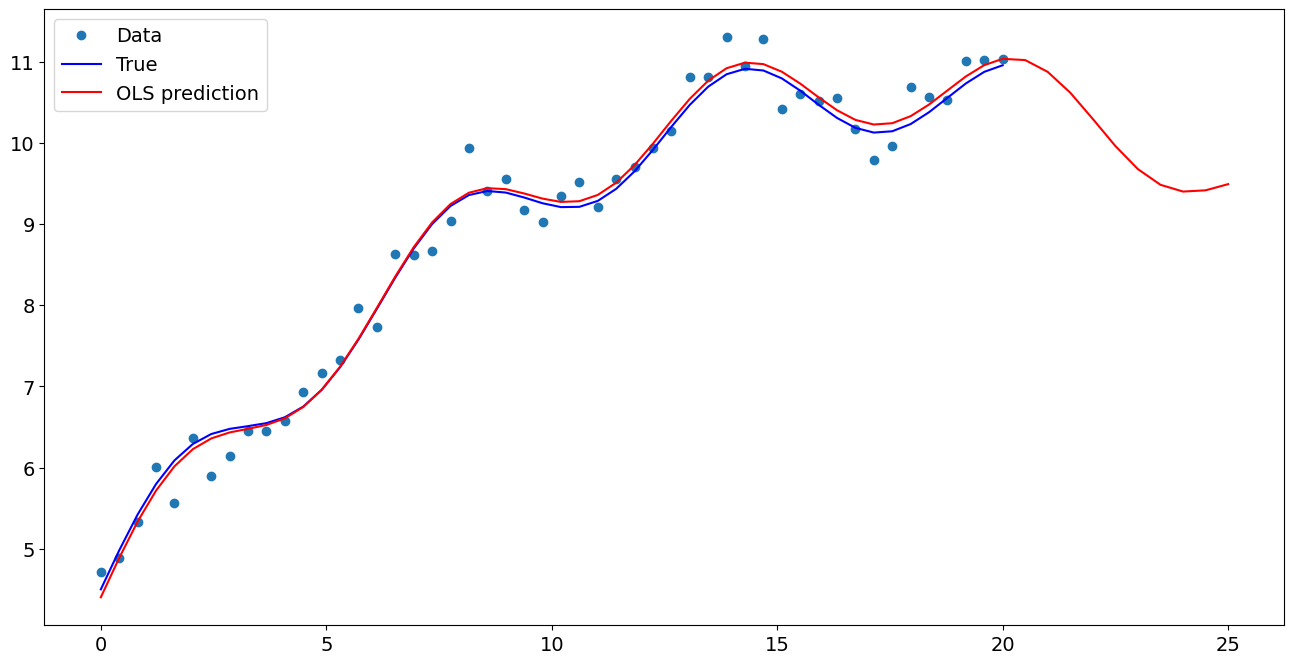

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.917610
x1                  0.515356
np.sin(x1)          0.491323
I((x1 - 5) ** 2)   -0.020611
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.020329
1    10.874683
2    10.618087
3    10.294451
4     9.961574
5     9.676995
6     9.483905
7     9.400572
8     9.415867
9     9.491993
dtype: float64